# # Линейная алгебра: аппроксимация функций

In [1]:
from math import sin, exp

In [2]:
def func(x):
    return sin(x / 5.) * exp(x / 10.) + 5. * exp(-x / 2.)

In [3]:
import numpy as np
from scipy import linalg

In [4]:
arrCoordinates = np.arange(1., 15.1, 0.1)
arrFunction = np.array([func(coordinate) for coordinate in arrCoordinates])

## Сформируем СЛАУ для многочлена первой степени, который должен совпадать с функцией в точках 1 и 15.

In [6]:
#многочлен первой степени
arrCoord1 = np.array([1, 15])
N = 2
arrA1 = np.empty((0, N))
for i in range(N):
    arrA1Line = list()
    for j in range(N):
        arrA1Line.append(arrCoord1[i] ** j)
    arrA1 = np.append(arrA1, np.array([arrA1Line]), axis = 0)

arrB1 = np.array([func(coordinate) for coordinate in arrCoord1])

In [7]:
arrX1 = linalg.solve(arrA1, arrB1)

In [9]:
print(arrCoord1)
print(arrA1)
print(arrB1)
print(arrX1)

[ 1 15]
[[ 1.  1.]
 [ 1. 15.]]
[3.25221687 0.63522142]
[ 3.43914511 -0.18692825]


In [10]:
def func1(x): return arrX1[0] + arrX1[1] * x
arrFunc1 = np.array([func1(coordinate) for coordinate in arrCoordinates])

In [11]:
%matplotlib inline
import matplotlib.pylab as plt

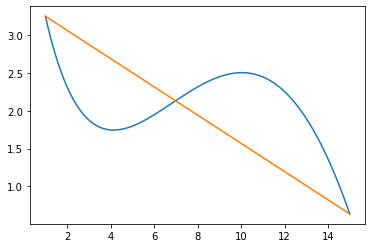

In [12]:
plt.plot(arrCoordinates, arrFunction, arrCoordinates, arrFunc1)
plt.show()

## Многочлен второй степени в точках 1, 8, 15.

In [13]:
arrCoord2 = np.array([1, 8, 15])
N = 3
arrA2 = np.empty((0, N))
for i in range(N):
    arrA2Line = list()
    for j in range(N):
        arrA2Line.append(arrCoord2[i] ** j)
    arrA2 = np.append(arrA2, np.array([arrA2Line]), axis = 0)
    
arrB2 = np.array([func(coordinate) for coordinate in arrCoord2])

In [14]:
arrX2 = linalg.solve(arrA2, arrB2)

In [15]:
print(arrCoord2)
print(arrA2)
print(arrB2)
print(arrX2)

[ 1  8 15]
[[  1.   1.   1.]
 [  1.   8.  64.]
 [  1.  15. 225.]]
[3.25221687 2.31617016 0.63522142]
[ 3.32512949 -0.06531159 -0.00760104]


In [16]:
def func2(x): return arrX2[0] + arrX2[1] * x + arrX2[2] * (x ** 2)
arrFunc2 = np.array([func2(coordinate) for coordinate in arrCoordinates])

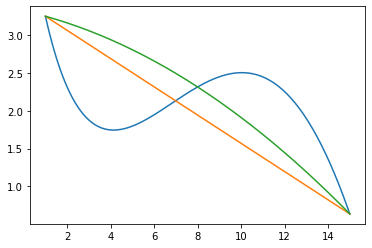

In [17]:
plt.plot(arrCoordinates, arrFunction, arrCoordinates, arrFunc1, arrCoordinates, arrFunc2)
plt.show()

## Многочлен третьей степени в точка 1, 4, 10, 15.

In [18]:
arrCoord3 = np.array([1, 4, 10, 15])
N = 4
arrA3 = np.empty((0, N))
for i in range(N):
    arrA3Line = list()
    for j in range(N):
        arrA3Line.append(arrCoord3[i] ** j)
    arrA3 = np.append(arrA3, np.array([arrA3Line]), axis = 0)
    
arrB3 = np.array([func(coordinate) for coordinate in arrCoord3])

arrX3 = linalg.solve(arrA3, arrB3)

In [19]:
print(arrCoord3)
print(arrA3)
print(arrB3)
print(arrX3)

[ 1  4 10 15]
[[1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03]
 [1.000e+00 1.500e+01 2.250e+02 3.375e+03]]
[3.25221687 1.74684595 2.50541641 0.63522142]
[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


In [20]:
def func3(x): return arrX3[0] + arrX3[1] * x + arrX3[2] * (x ** 2) + arrX3[3] * (x ** 3)
arrFunc3 = np.array([func3(coordinate) for coordinate in arrCoordinates])

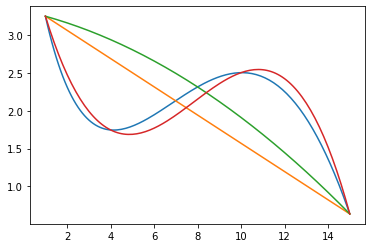

In [21]:
plt.plot(arrCoordinates, arrFunction, arrCoordinates, arrFunc1, arrCoordinates, arrFunc2, arrCoordinates, arrFunc3)
plt.show()

In [22]:
with open('submission_2.txt', 'w') as fileAnswer:
    for item in arrX3:
        fileAnswer.write(str(item) + ' ')